# Intro.
- Test Bed 결과 확인


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle
import configparser
import scipy.io as sio

from sklearn import svm, datasets
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [2]:
# new college 데이터
nc_real_corr_list = [[1, 187], [2, 188], [5, 193], [7, 195], [8, 196], [9, 197], [10, 198], [11, 199], [12, 200], [13, 201], [14, 202], [15, 203], [16, 204], [18, 204], [19, 205], [20, 206], [21, 207], [22, 208], [23, 207], [23, 209], [24, 209], [25, 209], [26, 210], [27, 211], [28, 212], [29, 210], [29, 212], [29, 213], [30, 212], [30, 214], [31, 213], [31, 215], [32, 216], [33, 217], [34, 218], [49, 237], [50, 238], [53, 241], [69, 255], [70, 256], [71, 257], [72, 258], [73, 259], [74, 260], [75, 261], [76, 262], [77, 263], [78, 262], [78, 263], [78, 264], [79, 263], [79, 265], [79, 266], [80, 263], [80, 264], [80, 265], [80, 266], [80, 267], [80, 268], [80, 270], [81, 269], [81, 271], [82, 270], [82, 272], [83, 271], [84, 272], [85, 273], [86, 274], [87, 275], [88, 276], [89, 277], [90, 278], [91, 279], [108, 298], [109, 299], [110, 300], [111, 301], [112, 302], [113, 303], [114, 304], [115, 306], [157, 347], [158, 348], [161, 351], [162, 352], [163, 353], [164, 354], [165, 355], [166, 356], [167, 357], [168, 358], [168, 360], [169, 359], [169, 361], [169, 363], [170, 360], [170, 364], [171, 361], [171, 363], [172, 362], [172, 364], [173, 363], [174, 362], [174, 364], [175, 363], [398, 548], [398, 944], [405, 561], [406, 562], [407, 563], [408, 564], [408, 962], [409, 565], [409, 963], [410, 566], [411, 567], [412, 568], [413, 965], [414, 966], [415, 569], [431, 587], [432, 588], [433, 589], [434, 590], [435, 591], [436, 592], [437, 593], [438, 594], [442, 994], [444, 994], [445, 995], [499, 897], [518, 908], [519, 911], [520, 910], [520, 912], [521, 913], [522, 916], [523, 917], [524, 916], [524, 918], [525, 919], [545, 941], [546, 942], [547, 943], [548, 944], [549, 945], [550, 946], [551, 947], [551, 949], [552, 948], [552, 950], [553, 951], [560, 958], [561, 959], [561, 961], [562, 960], [564, 962], [565, 963], [566, 964], [603, 1001], [604, 1002], [605, 1003], [606, 1004], [607, 1005], [608, 1006], [609, 1007], [610, 1008], [611, 1009], [612, 1010], [652, 1050], [652, 1052], [653, 1051], [653, 1053], [654, 1052], [655, 1053], [656, 1054], [662, 1057], [662, 1058], [677, 1066], [762, 1158], [793, 1924], [795, 1120], [811, 1104], [815, 1100], [821, 1096], [822, 1095], [823, 1094], [850, 1069], [870, 1038], [870, 1039], [870, 1040], [870, 1041], [871, 1037], [871, 1038], [871, 1039], [871, 1040], [871, 1041], [1107, 1938], [1109, 1936], [1111, 1934], [1122, 1925], [1178, 1602], [1179, 1603], [1180, 1604], [1181, 1605], [1182, 1606], [1183, 1607], [1184, 1608], [1185, 1609], [1187, 1611], [1188, 1610], [1188, 1612], [1189, 1613], [1190, 1612], [1190, 1614], [1219, 1645], [1220, 1646], [1221, 1647], [1222, 1648], [1223, 1649], [1224, 1650], [1274, 1693], [1290, 1710], [1292, 1712], [1292, 1714], [1293, 1715], [1294, 1716], [1295, 1717], [1295, 1719], [1296, 1718], [1296, 1720], [1297, 1719], [1297, 1721], [1297, 1723], [1298, 1722], [1298, 1724], [1299, 1723], [1299, 1725], [1300, 1726], [1300, 1728], [1301, 1731], [1302, 1732], [1303, 1733], [1307, 1736], [1309, 1740]]

In [3]:
len(np.unique(nc_real_corr_list))

394

In [4]:
# import shutil
# Manual_LC_dataset = np.unique(np.array(cc_real_corr_list).flatten())
# for idx in Manual_LC_dataset:
#     src = "/media/dongwonshin/Ubuntu Data/Datasets/FAB-MAP/Image Data/City Centre/images/%04d.jpg" % idx
#     dst = "/media/dongwonshin/Ubuntu Data/Datasets/FAB-MAP/Image Data/City Centre ManualLC/images/"
#     shutil.copy(src,dst)

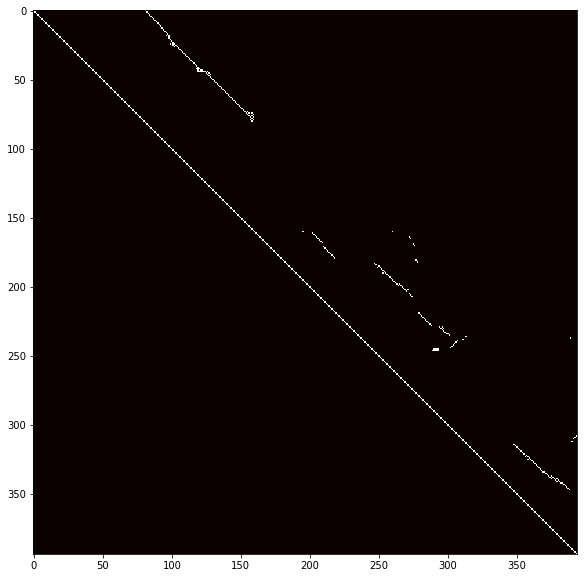

In [5]:
image_idx_order = np.unique(nc_real_corr_list)

GT_corr_mat = np.zeros((len(image_idx_order),len(image_idx_order)))

for a, i in enumerate(image_idx_order):
    for b, j in enumerate(image_idx_order):
        if i==j:
            GT_corr_mat[a,b] = 1
        if [i,j] in nc_real_corr_list:
            GT_corr_mat[a,b] = 1


plt.figure(figsize=(10,10))
plt.imshow(GT_corr_mat, cmap = 'hot')
plt.show()

In [7]:
def PrecisionRecallCurve(GT_corr_mat, esti_corr_mat):

    precision, recall, _ = precision_recall_curve(GT_corr_mat.flatten(), esti_corr_mat.flatten())
    average_precision = average_precision_score(GT_corr_mat.flatten(), esti_corr_mat.flatten())


#     # Plot Precision-Recall curve
#     plt.clf()
#     plt.plot(recall, precision, lw=2, color='navy', label='Precision-Recall curve')
#     plt.xlabel('Recall')
#     plt.ylabel('Precision')
#     plt.ylim([0.0, 1.05])
#     plt.xlim([0.0, 1.0])
#     plt.title('Precision-Recall example: AUC={0:0.2f}'.format(average_precision))
#     plt.legend(loc="lower left")
#     plt.show()
    
    return precision, recall
    
    
def theLatestResult(path_pattern):
    result_dirs = sorted(glob(path_pattern))
    the_latest_result_path = result_dirs[-1]
    print(the_latest_result_path)
    corr_mat_path = the_latest_result_path + '/corr_matrix.txt'
    param_cfg_path = the_latest_result_path + '/parameters.cfg'
    
    config = configparser.ConfigParser()
    config.read(param_cfg_path)
    print(dict(config.items('General')))
    

    return corr_mat_path, param_cfg_path

def theSpecificResult(path):
    corr_mat_path = path + '/corr_matrix.txt'
    param_cfg_path = path + '/output_config.ini'
    
    config = configparser.ConfigParser()
    config.read(param_cfg_path)
    print(dict(config.items('Experiment_parameters')))
    
    return corr_mat_path, param_cfg_path, dict(config.items('Experiment_parameters'))

# K=10, L=5

{'eval_dataset': 'New College', 'scoring_type': 'L1_NORM', 'depth_level': '5', 'cluster_center': '10', 'exp_method': 'orb'}
{'eval_dataset': 'New College', 'scoring_type': 'L1_NORM', 'depth_level': '5', 'cluster_center': '10', 'exp_method': 'brisk'}
{'eval_dataset': 'New College', 'network_model': 'bigger_feature_size', 'exp_method': 'proposed method', 'scoring_type': 'L1_NORM', 'cluster_center': '10', 'depth_level': '5', 'eval_desc': 'all_desc'}
{'eval_dataset': 'New College', 'network_model': 'bigger_feature_size', 'exp_method': 'SURF', 'scoring_type': 'L1_NORM', 'cluster_center': '10', 'depth_level': '5', 'eval_desc': 'all_desc'}
{'eval_dataset': 'New College', 'network_model': 'large-scale-training', 'exp_method': 'proposed method', 'scoring_type': 'L1_NORM', 'cluster_center': '10', 'depth_level': '5', 'eval_desc': 'all_desc_512dim'}


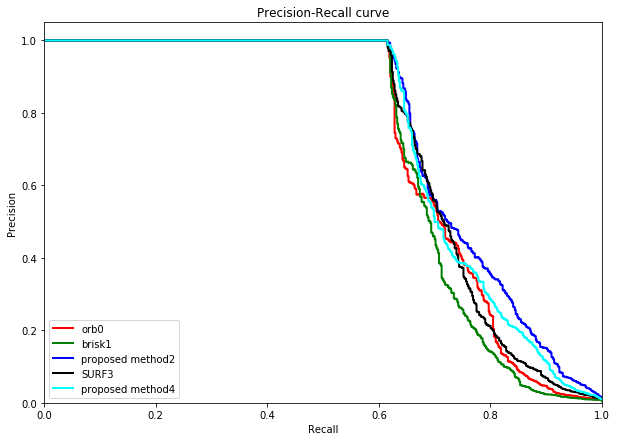

In [16]:
testcases = [
'/home/dongwonshin/Desktop/LoopClosureDetectionTestBed/result_folder/2017-09-05-16-07-01',
'/home/dongwonshin/Desktop/LoopClosureDetectionTestBed/result_folder/2017-09-05-15-59-18',
'/home/dongwonshin/Desktop/LoopClosureDetectionTestBed/result_folder/2017-09-06-10-52-06',
'/home/dongwonshin/Desktop/LoopClosureDetectionTestBed/result_folder/2017-09-05-14-29-48',
'/home/dongwonshin/Desktop/LoopClosureDetectionTestBed/result_folder/2017-09-13-14-48-53'
]

curve_results = []
for testcase in testcases:
    corr_mat, param_cfg, params = theSpecificResult(testcase)
    esti_corr_mat = np.loadtxt(corr_mat)
    curve_results.append([PrecisionRecallCurve(GT_corr_mat, esti_corr_mat), params])
    
    # Plot Precision-Recall curve
plt.figure(figsize=(10,7))
plt.clf()
cnt = 0
for curve, color in zip(curve_results, ['red','green','blue','black','cyan']):
    plt.plot(curve[0][1], curve[0][0], lw=2, color=color, label=curve[1]['exp_method']+str(cnt))
    cnt +=1

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")
plt.show()

# K=5, L=5

{'eval_dataset': 'New College', 'scoring_type': 'L1_NORM', 'depth_level': '5', 'cluster_center': '5', 'exp_method': 'orb'}
{'eval_dataset': 'New College', 'scoring_type': 'L1_NORM', 'depth_level': '5', 'cluster_center': '5', 'exp_method': 'brisk'}
{'eval_dataset': 'New College', 'network_model': 'bigger_feature_size', 'exp_method': 'proposed method', 'scoring_type': 'L1_NORM', 'cluster_center': '5', 'depth_level': '5', 'eval_desc': 'all_desc'}
{'eval_dataset': 'New College', 'network_model': 'bigger_feature_size', 'exp_method': 'SURF', 'scoring_type': 'L1_NORM', 'cluster_center': '5', 'depth_level': '5', 'eval_desc': 'all_desc'}
{'eval_dataset': 'New College', 'network_model': 'large-scale-training', 'exp_method': 'proposed method', 'scoring_type': 'L1_NORM', 'cluster_center': '5', 'depth_level': '5', 'eval_desc': 'all_desc_512dim'}


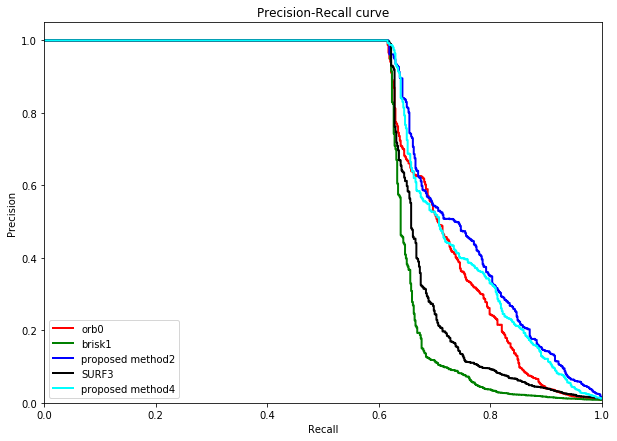

In [15]:
testcases = [
'/home/dongwonshin/Desktop/LoopClosureDetectionTestBed/result_folder/2017-09-05-17-42-16',
'/home/dongwonshin/Desktop/LoopClosureDetectionTestBed/result_folder/2017-09-05-17-38-21',
'/home/dongwonshin/Desktop/LoopClosureDetectionTestBed/result_folder/2017-09-06-01-38-31',
'/home/dongwonshin/Desktop/LoopClosureDetectionTestBed/result_folder/2017-09-05-16-50-23',
'/home/dongwonshin/Desktop/LoopClosureDetectionTestBed/result_folder/2017-09-13-14-22-09'
]

curve_results = []
for testcase in testcases:
    corr_mat, param_cfg, params = theSpecificResult(testcase)
    esti_corr_mat = np.loadtxt(corr_mat)
    curve_results.append([PrecisionRecallCurve(GT_corr_mat, esti_corr_mat), params])

    # Plot Precision-Recall curve
plt.figure(figsize=(10,7))
plt.clf()
cnt = 0
for curve, color in zip(curve_results, ['red','green','blue','black','cyan']):
    plt.plot(curve[0][1], curve[0][0], lw=2, color=color, label=curve[1]['exp_method']+str(cnt))
    cnt+=1
             

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")
plt.show()

# K=8, L=5

{'eval_dataset': 'New College', 'scoring_type': 'L1_NORM', 'depth_level': '5', 'cluster_center': '8', 'exp_method': 'orb'}
{'eval_dataset': 'New College', 'scoring_type': 'L1_NORM', 'depth_level': '5', 'cluster_center': '8', 'exp_method': 'brisk'}
{'eval_dataset': 'New College', 'network_model': 'bigger_feature_size', 'exp_method': 'proposed method', 'scoring_type': 'L1_NORM', 'cluster_center': '8', 'depth_level': '5', 'eval_desc': 'all_desc'}
{'eval_dataset': 'New College', 'network_model': 'bigger_feature_size', 'exp_method': 'SURF', 'scoring_type': 'L1_NORM', 'cluster_center': '8', 'depth_level': '5', 'eval_desc': 'all_desc'}


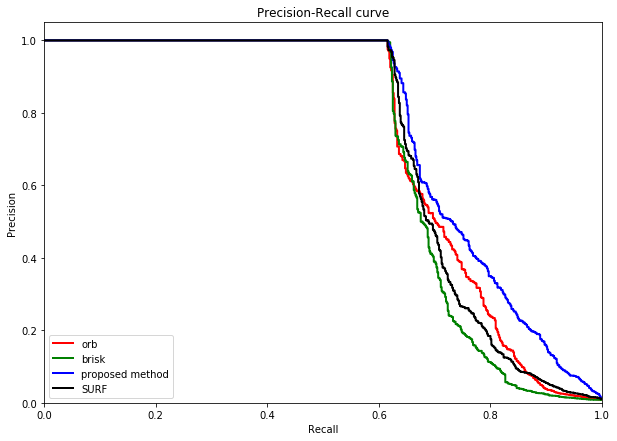

In [11]:
testcases = [
'/home/dongwonshin/Desktop/LoopClosureDetectionTestBed/result_folder/2017-09-06-18-14-00',
'/home/dongwonshin/Desktop/LoopClosureDetectionTestBed/result_folder/2017-09-06-18-08-37',
'/home/dongwonshin/Desktop/LoopClosureDetectionTestBed/result_folder/2017-09-06-15-25-39',
'/home/dongwonshin/Desktop/LoopClosureDetectionTestBed/result_folder/2017-09-06-14-15-21',
]

curve_results = []
for testcase in testcases:
    corr_mat, param_cfg, params = theSpecificResult(testcase)
    esti_corr_mat = np.loadtxt(corr_mat)
    curve_results.append([PrecisionRecallCurve(GT_corr_mat, esti_corr_mat), params])

    # Plot Precision-Recall curve
plt.figure(figsize=(10,7))
plt.clf()
for curve, color in zip(curve_results, ['red','green','blue','black']):
    plt.plot(curve[0][1], curve[0][0], lw=2, color=color, label=curve[1]['exp_method'])

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")
plt.show()

# K=15, L=5

{'eval_dataset': 'New College', 'scoring_type': 'L1_NORM', 'depth_level': '5', 'cluster_center': '15', 'exp_method': 'orb'}
{'eval_dataset': 'New College', 'scoring_type': 'L1_NORM', 'depth_level': '5', 'cluster_center': '15', 'exp_method': 'brisk'}
{'eval_dataset': 'New College', 'network_model': 'bigger_feature_size', 'exp_method': 'proposed method', 'scoring_type': 'L1_NORM', 'cluster_center': '15', 'depth_level': '5', 'eval_desc': 'all_desc'}
{'eval_dataset': 'New College', 'network_model': 'bigger_feature_size', 'exp_method': 'SURF', 'scoring_type': 'L1_NORM', 'cluster_center': '15', 'depth_level': '5', 'eval_desc': 'all_desc'}
{'eval_dataset': 'New College', 'network_model': 'large-scale-training', 'exp_method': 'proposed method', 'scoring_type': 'L1_NORM', 'cluster_center': '15', 'depth_level': '5', 'eval_desc': 'all_desc_512dim'}


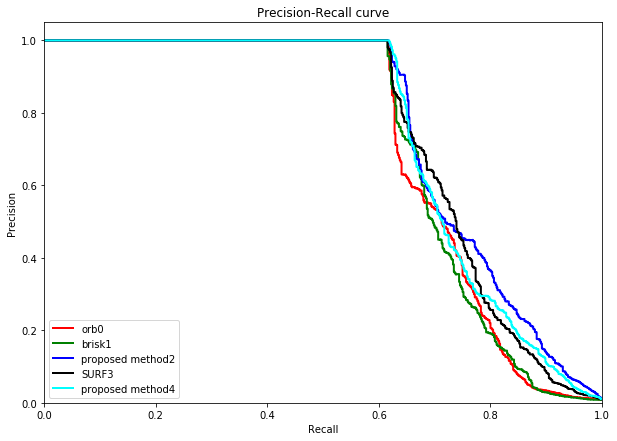

In [14]:
testcases = [
'/home/dongwonshin/Desktop/LoopClosureDetectionTestBed/result_folder/2017-09-07-02-59-57',
'/home/dongwonshin/Desktop/LoopClosureDetectionTestBed/result_folder/2017-09-07-02-48-51',
'/home/dongwonshin/Desktop/LoopClosureDetectionTestBed/result_folder/2017-09-06-22-10-11',
'/home/dongwonshin/Desktop/LoopClosureDetectionTestBed/result_folder/2017-09-06-20-11-48',
'/home/dongwonshin/Desktop/LoopClosureDetectionTestBed/result_folder/2017-09-13-14-04-41'
]

curve_results = []
for testcase in testcases:
    corr_mat, param_cfg, params = theSpecificResult(testcase)
    esti_corr_mat = np.loadtxt(corr_mat)
    curve_results.append([PrecisionRecallCurve(GT_corr_mat, esti_corr_mat), params])
    
# Plot Precision-Recall curve
plt.figure(figsize=(10,7))
plt.clf()
cnt=0
for curve, color in zip(curve_results, ['red','green','blue','black','cyan']):
    plt.plot(curve[0][1], curve[0][0], lw=2, color=color, label=curve[1]['exp_method']+str(cnt))
    cnt+=1

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")
plt.show()